# Sales Analysis

In [1]:
#Importing Necessary Libraries
import pandas as pd
import os

### Task 1: Merging 12 months data into single csv

In [2]:
#df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Sales_Data')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data,df])

all_month_data.to_csv('all_data.csv', index = False)


Read in Updated DataFrame

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean the data

##### Dropping NAN

In [4]:
#Tracing NAN
nan_df =  all_data[all_data.isna().any(axis=1)]
nan_df.head()

#Dropping
all_data = all_data.dropna(how='all')
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"
99,176652,LG Washing Machine,1,600.0,04/09/19 20:04,"502 14th St, New York City, NY 10001"


##### Find 'Or' and delete it  (Or-Duplicated Header Frames)

In [5]:
# Tracing
or_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
or_df.head(1000)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
# Cleaning 'Or' Rows
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Converting the columns to correct data types

In [7]:
all_data['Quantity Ordered'] =pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#make int
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augmenting data with additional Columns

### Task 2: Add Month Column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data["Month"] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a Sales Column

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Adding a City Column

In [10]:
# Usin .apply method:
# splitting Purchase Address
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# apply for whole column and lambda access the cell contern
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Q1: What was the best month for sale? How much was earned that month?

In [11]:
results = all_data.groupby('Month').sum()

In [13]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales $')
plt.xlabel('Month No.')
plt.savefig('1.png',bbox_inches='tight')
plt.show()

<Figure size 640x480 with 1 Axes>

#### Q2: What City has highest no. of Sales?

In [14]:
results = all_data.groupby('City').sum()
results


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


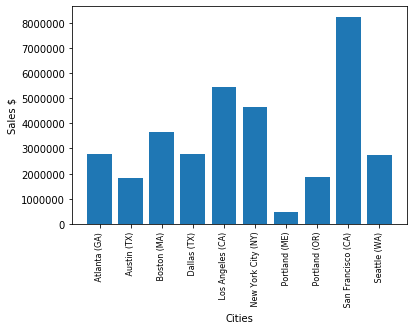

In [16]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('Sales $')
plt.xlabel('Cities')
plt.savefig('2.png',bbox_inches='tight')
plt.show()


#### Q3: What time should we display advertisements to maximize likelihood of customer's  buying product?

In [17]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [19]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


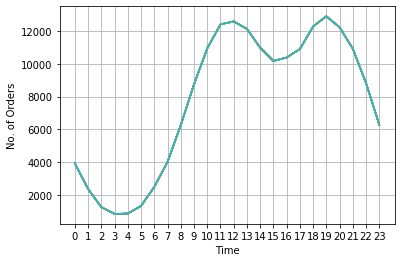

In [20]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Time')
plt.ylabel('No. of Orders')
plt.savefig('3.png',bbox_inches='tight')
plt.show()
# The time of ad recommendations is around 11/12am and 7pm

#### Q4:  What products are most often sold together?

In [21]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Reomving the duplicate ordered rows
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

C:\Users\Susant\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [22]:
from itertools import combinations
from collections import Counter 

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5: What product sold the most? Why do you think it sold the most?

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


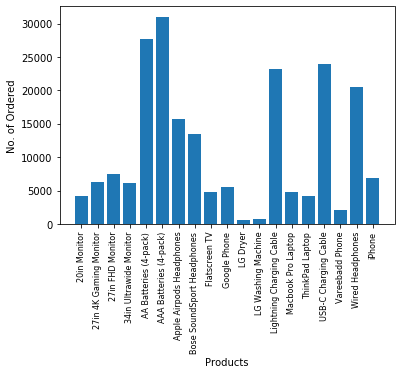

In [24]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('No. of Ordered')
plt.savefig('5.png',bbox_inches='tight')
plt.show()

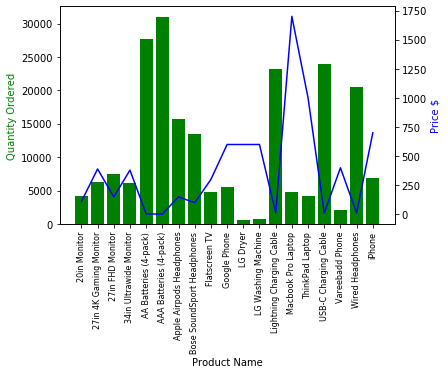

In [25]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price $',color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.savefig('5_1.png',bbox_inches='tight')
plt.show()